Video youtube de ECG : El de 2h y otro resumen
Paper en la web de los datasets
Aprender pandas de cero.
Ver como funcionan los notebooks
Descargar los records
https://physionet.org/content/wfdb-python/4.0.0/
https://wfdb.readthedocs.io/en/latest/index.html

In [ ]:
import numpy as np
import pandas as pd
import torch
import os
cwd = os.getcwd()
cwd



'/home/dame/Descargas/Idoven-Data-Scientist'

In [ ]:

df = pd.Series({'year': 2, 'month': 2, 'day': 4, 'hour': 3})
data2 = pd.read_csv(cwd+'/data/physionet.org/files/ptb-xl/1.0.2/ptbxl_database.csv')  
data2.shape

(21801, 44)

In [ ]:
data3=data2[data2.validated_by_human==1]
data3.shape

(16058, 44)

In [ ]:
data2.index

RangeIndex(start=0, stop=21801, step=1)

In [ ]:
data4=pd.read_csv(cwd+'/data/physionet.org/files/ptb-xl/1.0.2/ptbxl_database.csv', index_col='ecg_id'  )
data4.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            21828, 21829, 21830, 21831, 21832, 21833, 21834, 21835, 21836,
            21837],
           dtype='int64', name='ecg_id', length=21801)

In [ ]:
data2.keys()



Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'r_peaks', 'RS-LVH', 'S12-LVH', 'R56-LVH', 'QRS-LVH', 'LI-LVH',
       'SLI-LVH', 'QRS-CLBB', 'ST-ELEV-MI', 'ST-DEPR-MI', 'Q-ISC',
       'Q-ISC-QPeak', 'Q-ISC-V2V3', 'Q-ISC-RPeak', 'STRAIN', 'MI-ALL'],
      dtype='object')

In [ ]:
valuecounts=data4.initial_autogenerated_report.value_counts()
valuecounts.keys()[0]


False

In [ ]:
data4.scp_codes.values[0:2]
data4.filename_lr.values[0:3]

array(['records100/00000/00001_lr', 'records100/00000/00002_lr',
       'records100/00000/00003_lr'], dtype=object)

In [ ]:
data5=pd.read_csv(cwd+'/data/physionet.org/files/ptb-xl/1.0.2/scp_statements.csv' )


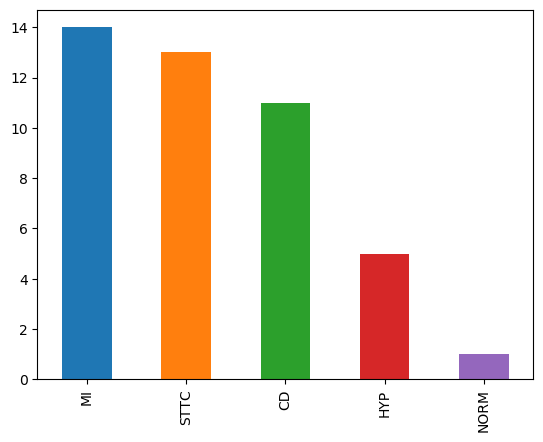

In [ ]:
types = data5.diagnostic_class.value_counts()
types.plot(kind='bar',color=['C0', 'C1', 'C2', 'C3', 'C4'])

In [ ]:

import wfdb
path = cwd + '/data/physionet.org/files/ptb-xl/1.0.2/'
signals, fields = wfdb.rdsamp(path + data4.filename_lr.values[3])

In [ ]:
type(signals)
signals.shape
type(fields)
fields

{'fs': 100,
 'sig_len': 1000,
 'n_sig': 12,
 'base_date': None,
 'base_time': None,
 'units': ['mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV'],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'comments': []}

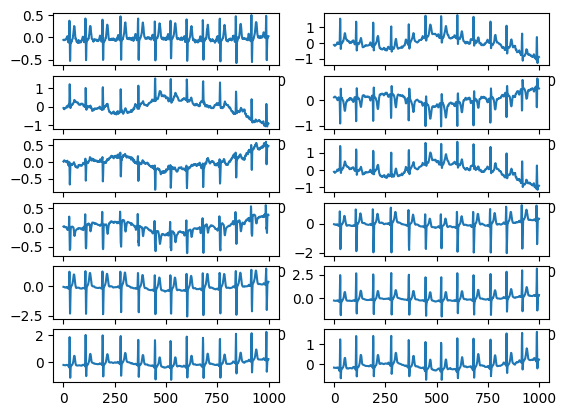

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6,2)
i=0
for  ax1 in axs:
  for ax in ax1:
    data = signals[:,i]
    #print(data.shape)
    ax.plot(range(data.shape[0]),data)
    i = i + 1



In [ ]:
data4aux=data4[data4.heart_axis.isna()==False]
data4aux.heart_axis

ecg_id
7         LAD
8         LAD
17       ALAD
18        LAD
20        LAD
         ... 
21833     LAD
21834     MID
21835     MID
21836     LAD
21837     MID
Name: heart_axis, Length: 13331, dtype: object